In [1]:
! ls

Code
Data
Eric––Project_1_Workbook.ipynb
Images
README.md
lorela_working_nb-Copy2.ipynb
microsoft_movie_needs_analysis-Copy1.ipynb
microsoft_movie_needs_analysis.ipynb


In [2]:
! cd unzippedData

/bin/bash: line 0: cd: unzippedData: No such file or directory


In [3]:
! ls

Code
Data
Eric––Project_1_Workbook.ipynb
Images
README.md
lorela_working_nb-Copy2.ipynb
microsoft_movie_needs_analysis-Copy1.ipynb
microsoft_movie_needs_analysis.ipynb


In [4]:
! cd /unzippedData

/bin/bash: line 0: cd: /unzippedData: No such file or directory


In [5]:
! ls

Code
Data
Eric––Project_1_Workbook.ipynb
Images
README.md
lorela_working_nb-Copy2.ipynb
microsoft_movie_needs_analysis-Copy1.ipynb
microsoft_movie_needs_analysis.ipynb


In [6]:
cd unzippedData

[Errno 2] No such file or directory: 'unzippedData'
/Users/ericdenbin/Documents/flatiron_ds/phase_1/phase_1_project/lej_project1


In [7]:
! ls

Code
Data
Eric––Project_1_Workbook.ipynb
Images
README.md
lorela_working_nb-Copy2.ipynb
microsoft_movie_needs_analysis-Copy1.ipynb
microsoft_movie_needs_analysis.ipynb


In [8]:
#Importing pandas, datetime, matplotlib, and seaborn libaries

import pandas as pd
import datetime
import seaborn as sns


In [9]:
! ls

Code
Data
Eric––Project_1_Workbook.ipynb
Images
README.md
lorela_working_nb-Copy2.ipynb
microsoft_movie_needs_analysis-Copy1.ipynb
microsoft_movie_needs_analysis.ipynb


In [10]:
cd Data

/Users/ericdenbin/Documents/flatiron_ds/phase_1/phase_1_project/lej_project1/Data


In [11]:
! ls

Budget_Worldwide_And_Domestic_ROI_For_Top_Movies_Month
bom.movie_gross.csv
imdb.name.basics.csv
imdb.title.akas.csv
imdb.title.basics.csv
imdb.title.crew.csv.gz
imdb.title.principals.csv
imdb.title.ratings.csv.gz
rt.movie_info.tsv
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv
top_movie_list.txt


In [12]:
# Defining top performing movies 
    # highest grossing and highest ROI
    
    # action: clean, filter, analyze this dataset

    # get the list of value counts of top genres (and actors, directors, studios, writers) based on this new dataset created 
        # look back on other (top_critic=1,  i.e. rating >4)
    
    # draw correlations between the top performing movies and genre, directors, studios, writers, actors, ratings
    
    # also looking into movies performing poorly (given enough time)

In [13]:
movie_budgets_df = pd.read_csv("tn.movie_budgets.csv")


In [14]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
# Engineering two new features for the movie budgets dataframe called domestic profit and worldwide profit, 
# which is the production budget subtracted from domestic gross and worldwide gross, respectively

#First we have to clean the columns, removing the dollar sign and commas and creating integers

movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].map(lambda x: x[1:])



In [16]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","620,181,382","$1,316,721,747"


In [17]:
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].map(lambda x: int(x.replace(",","")))

In [18]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,"$1,316,721,747"


In [19]:
type(movie_budgets_df['domestic_gross'][1])

numpy.int64

In [20]:
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].map(lambda x: int(x[1:].replace(",","")))

In [21]:
type(movie_budgets_df['worldwide_gross'][1])

numpy.int64

In [22]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].map(lambda x: int(x[1:].replace(",","")))

In [23]:
type(movie_budgets_df['production_budget'][1])

numpy.int64

In [24]:
movie_budgets_df['domestic_profit'] = movie_budgets_df['domestic_gross'] - movie_budgets_df['production_budget']

movie_budgets_df['worldwide_profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']


In [25]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747


In [26]:
movie_budgets_df['domestic_roi'] = movie_budgets_df['domestic_profit']/movie_budgets_df['production_budget']

In [27]:
movie_budgets_df['worldwide_roi'] = movie_budgets_df['worldwide_profit']/movie_budgets_df['production_budget']

In [28]:
movie_budgets_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,2.060988,5.710167
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,1.262718,5.827114
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,9420425,663420425,0.031401,2.211401
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,-70975705,355945209,-0.236586,1.186484
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,-99925825,579620923,-0.333086,1.932070


In [29]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696


In [30]:
movie_budgets_df["worldwide_profit_margin"] = movie_budgets_df["worldwide_profit"]/movie_budgets_df["worldwide_gross"]

movie_budgets_df["domestic_profit_margin"] = movie_budgets_df["domestic_profit"]/movie_budgets_df['domestic_gross']

In [31]:

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577,0.846921,0.441163
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673,0.607331,-0.703283
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108,-1.337036,-7.184770
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841,0.764364,0.279748
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696,0.759251,0.488859


In [32]:
movie_budgets_df['month'] = movie_budgets_df['release_date'].map(lambda x: datetime.datetime.strptime(x, "%b %d, %Y").month)

movie_budgets_df['year'] = movie_budgets_df['release_date'].map(lambda x: datetime.datetime.strptime(x, "%b %d, %Y").year)

In [33]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5782 non-null   int64  
 1   release_date             5782 non-null   object 
 2   movie                    5782 non-null   object 
 3   production_budget        5782 non-null   int64  
 4   domestic_gross           5782 non-null   int64  
 5   worldwide_gross          5782 non-null   int64  
 6   domestic_profit          5782 non-null   int64  
 7   worldwide_profit         5782 non-null   int64  
 8   domestic_roi             5782 non-null   float64
 9   worldwide_roi            5782 non-null   float64
 10  worldwide_profit_margin  5782 non-null   float64
 11  domestic_profit_margin   5782 non-null   float64
 12  month                    5782 non-null   int64  
 13  year                     5782 non-null   int64  
dtypes: float64(4), int64(8),

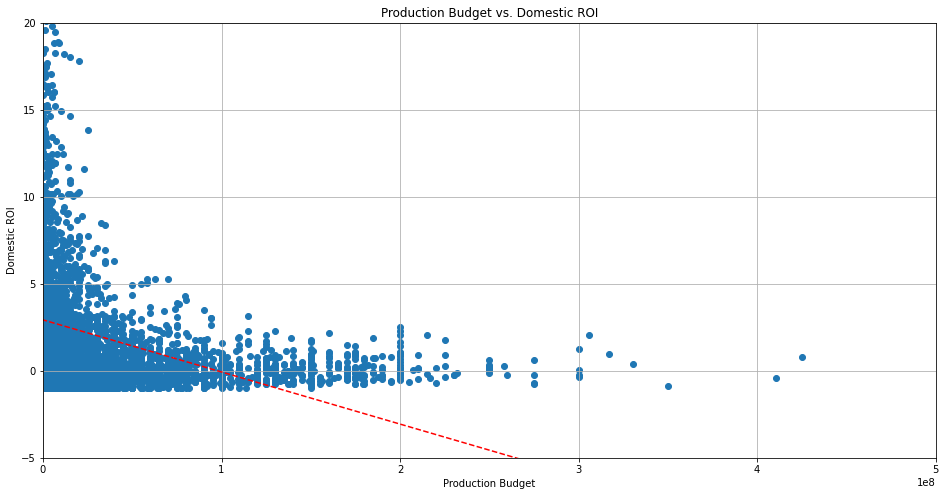

In [34]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (16,8))

X = movie_budgets_df['production_budget']

Y = movie_budgets_df['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')

plt.xlim(0, 500000000)
plt.ylim(-5, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

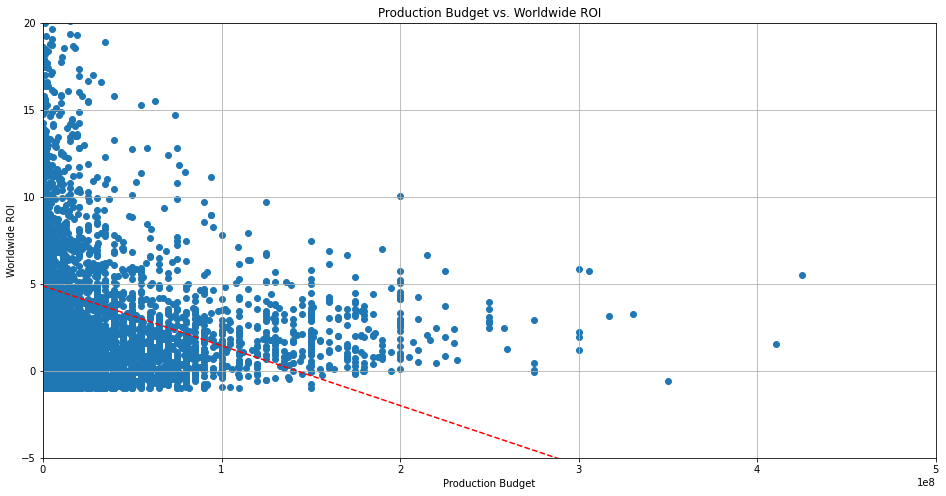

In [35]:
fig, ax = plt.subplots(figsize = (16,8))

X = movie_budgets_df['production_budget']

Y = movie_budgets_df['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

plt.xlim(0, 500000000)
plt.ylim(-5, 20)
plt.grid()

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

In [36]:
relevant_movies = movie_budgets_df[(movie_budgets_df['worldwide_gross'] > 0) & (movie_budgets_df['domestic_gross'] > 0) & (movie_budgets_df['production_budget'] >= 5000000) & (movie_budgets_df['year'] != 2020) ]
relevant_movies.head()
relevant_movies.shape

(4196, 14)

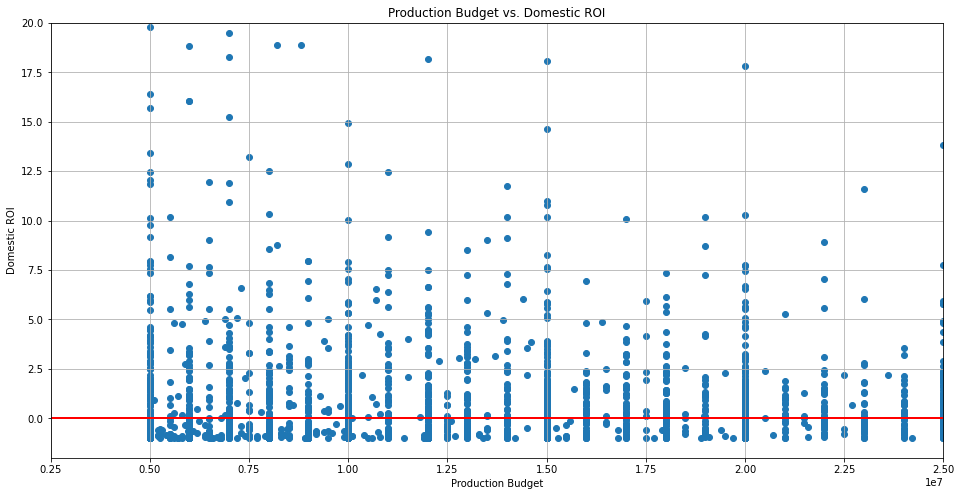

In [37]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 5 and 525 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(2500000, 25000000)
plt.ylim(-2, 20)
plt.grid();



In [38]:
num_movies_5_to_25_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] >= 5000000) & (relevant_movies['production_budget'] <= 25000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_5_to_25_with_neg_return_dom


985

In [39]:
per_movies_5_to_25_with_neg_return_dom = (num_movies_5_to_25_with_neg_return_dom/(num_movies_5_to_25_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] >= 5000000) & (relevant_movies['production_budget'] <= 25000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_5_to_25_with_neg_return_dom

47.33301297453147

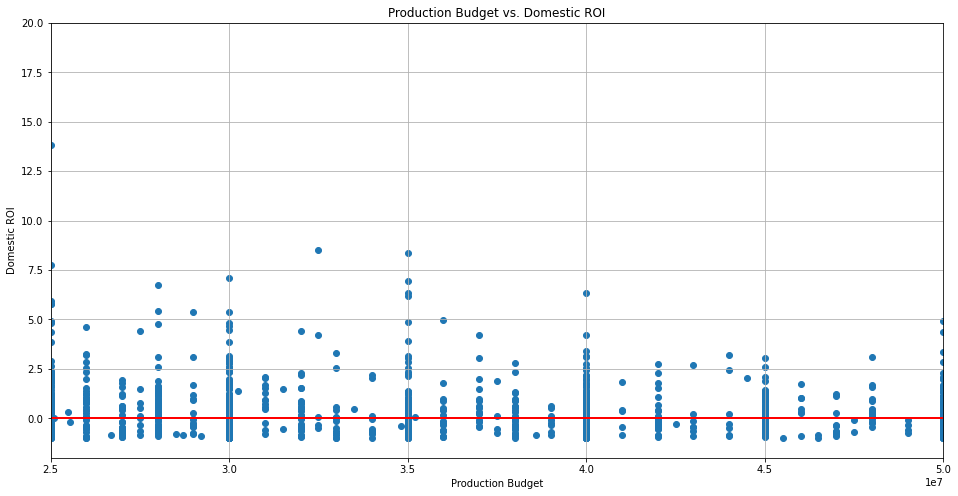

In [40]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 25 and 50 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(25000000, 50000000)
plt.ylim(-2, 20)
plt.grid();


In [41]:
num_movies_25_to_50_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] > 25000000) & (relevant_movies['production_budget'] <= 50000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_25_to_50_with_neg_return_dom

511

In [42]:
per_movies_25_to_50_with_neg_return_dom = (num_movies_25_to_50_with_neg_return_dom/(num_movies_25_to_50_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] > 25000000) & (relevant_movies['production_budget'] <= 50000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_25_to_50_with_neg_return_dom

48.899521531100476

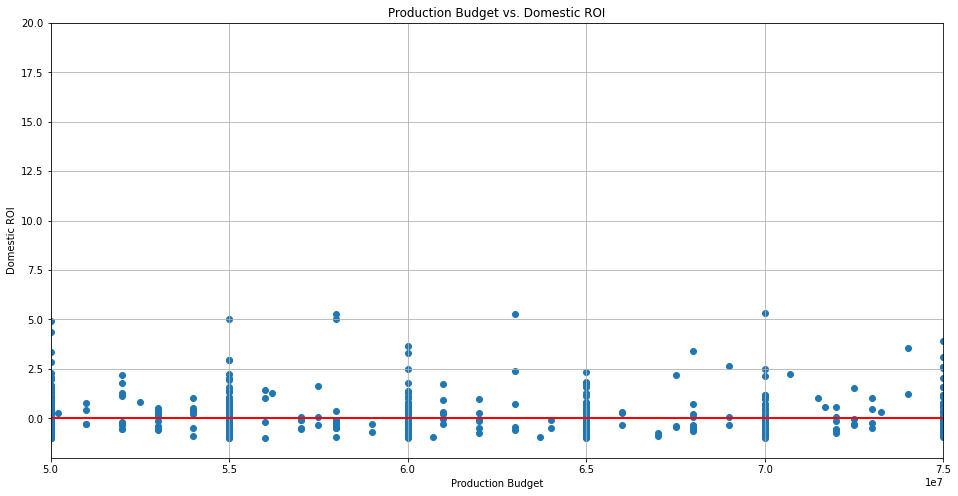

In [43]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 50 and 75 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(50000000, 75000000)
plt.ylim(-2, 20)
plt.grid();


In [44]:
num_movies_50_to_75_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] > 50000000) & (relevant_movies['production_budget'] <= 75000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_50_to_75_with_neg_return_dom

248

In [45]:
per_movies_50_to_75_with_neg_return_dom = (num_movies_50_to_75_with_neg_return_dom/(num_movies_50_to_75_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] > 50000000) & (relevant_movies['production_budget'] <= 75000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_50_to_75_with_neg_return_dom

54.988913525498894

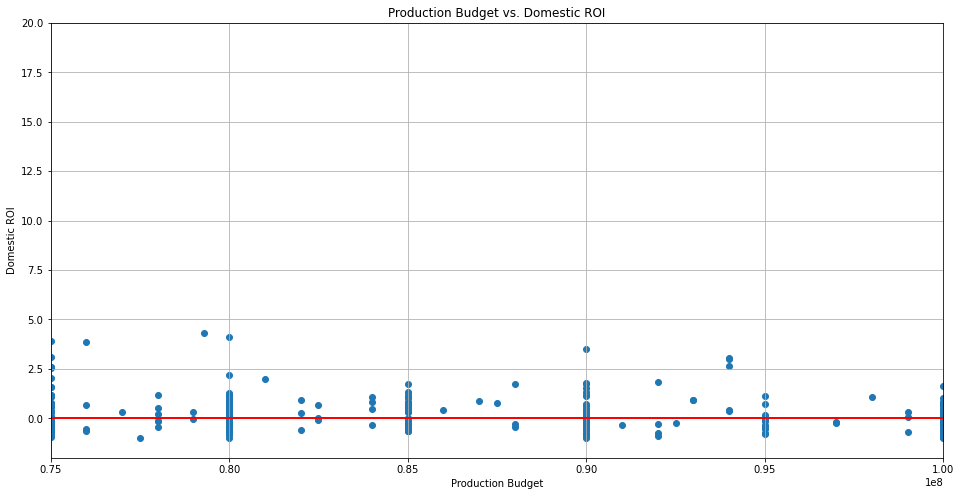

In [46]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 75 and 100 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(75000000, 100000000)
plt.ylim(-2, 20)
plt.grid();



In [47]:
num_movies_75_to_100_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] > 75000000) & (relevant_movies['production_budget'] <= 100000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_75_to_100_with_neg_return_dom


137

In [48]:
per_movies_75_to_100_with_neg_return_dom = (num_movies_75_to_100_with_neg_return_dom/(num_movies_75_to_100_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] > 75000000) & (relevant_movies['production_budget'] <= 100000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_75_to_100_with_neg_return_dom

53.30739299610895

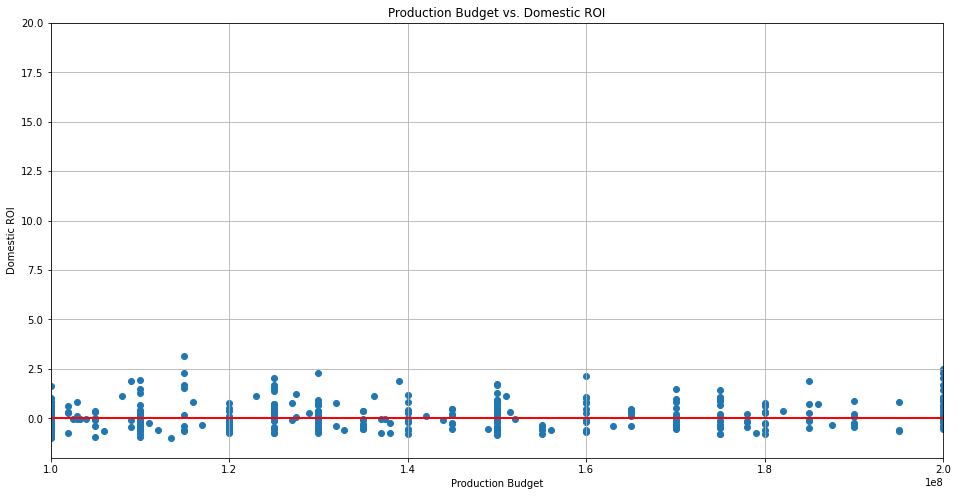

In [49]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 100 and 200 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(100000000, 200000000)
plt.ylim(-2, 20)
plt.grid();

In [50]:
num_movies_100_to_200_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] > 100000000) & (relevant_movies['production_budget'] <= 200000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_100_to_200_with_neg_return_dom

161

In [51]:
per_movies_100_to_200_with_neg_return_dom = (num_movies_100_to_200_with_neg_return_dom/(num_movies_100_to_200_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] > 100000000) & (relevant_movies['production_budget'] <= 200000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_100_to_200_with_neg_return_dom

50.155763239875384

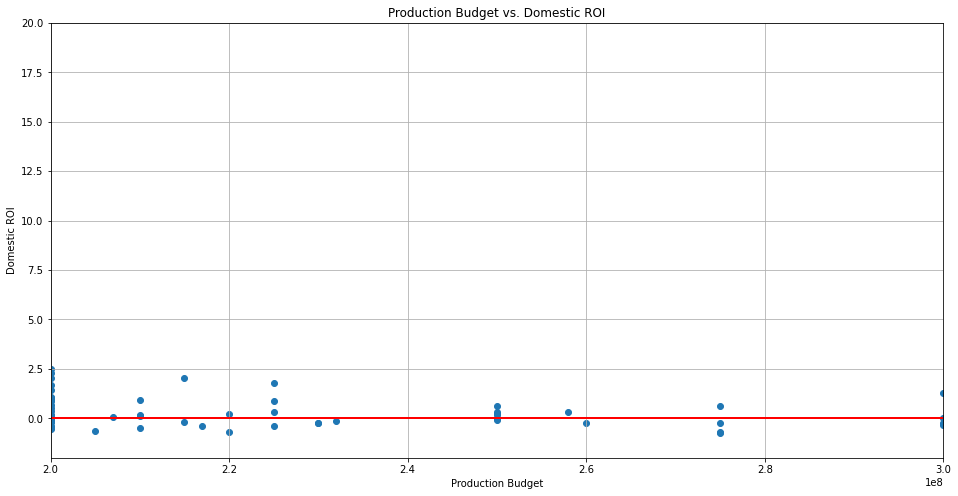

In [52]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 200 and 300 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(200000000, 300000000)
plt.ylim(-2, 20)
plt.grid();

In [53]:
num_movies_200_to_300_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] > 200000000) & (relevant_movies['production_budget'] <= 300000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_200_to_300_with_neg_return_dom

16

In [54]:
per_movies_200_to_300_with_neg_return_dom = (num_movies_200_to_300_with_neg_return_dom/(num_movies_200_to_300_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] > 200000000) & (relevant_movies['production_budget'] <= 300000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_200_to_300_with_neg_return_dom

45.714285714285715

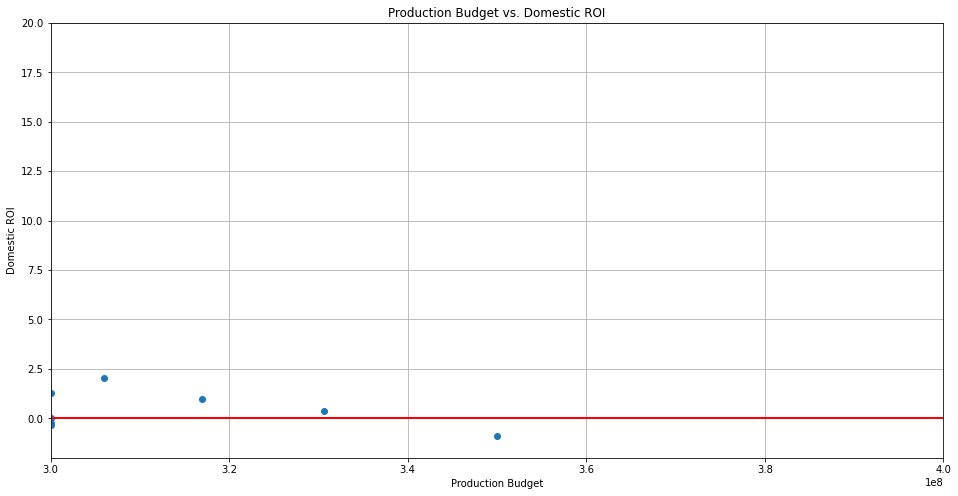

In [55]:
# Segment of Production Budget vs. Domestic ROI where production budget is between 300 and 400 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(300000000, 400000000)
plt.ylim(-2, 20)
plt.grid();

In [56]:
num_movies_300_to_400_with_neg_return_dom = relevant_movies[(relevant_movies['production_budget'] > 300000000) & (relevant_movies['production_budget'] <= 400000000) & (relevant_movies['domestic_roi'] <= 0)].shape[0]
num_movies_300_to_400_with_neg_return_dom

1

In [57]:
per_movies_300_to_400_with_neg_return_dom = (num_movies_300_to_400_with_neg_return_dom/(num_movies_300_to_400_with_neg_return_dom + (relevant_movies[(relevant_movies['production_budget'] > 300000000) & (relevant_movies['production_budget'] <= 400000000) & (relevant_movies['domestic_roi'] > 0)].shape[0]))) * 100
per_movies_300_to_400_with_neg_return_dom

25.0

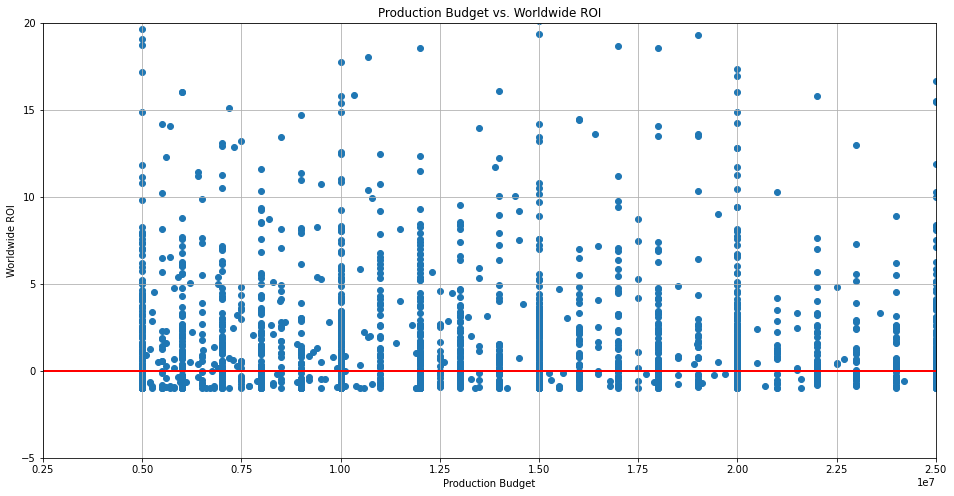

In [58]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 5 and 25 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(2500000, 25000000)
plt.ylim(-5, 20)
plt.grid();



In [59]:
num_movies_5_to_25_with_neg_return_ww = relevant_movies[(relevant_movies['production_budget'] >= 5000000) & (relevant_movies['production_budget'] <= 25000000) & (relevant_movies['worldwide_roi'] <= 0)].shape[0]
num_movies_5_to_25_with_neg_return_ww

726

In [60]:
per_movies_5_to_25_with_neg_return_ww = (num_movies_5_to_25_with_neg_return_ww/(num_movies_5_to_25_with_neg_return_ww + (relevant_movies[(relevant_movies['production_budget'] >= 5000000) & (relevant_movies['production_budget'] <= 25000000) & (relevant_movies['worldwide_roi'] > 0)].shape[0]))) * 100
per_movies_5_to_25_with_neg_return_ww

34.88707352234503

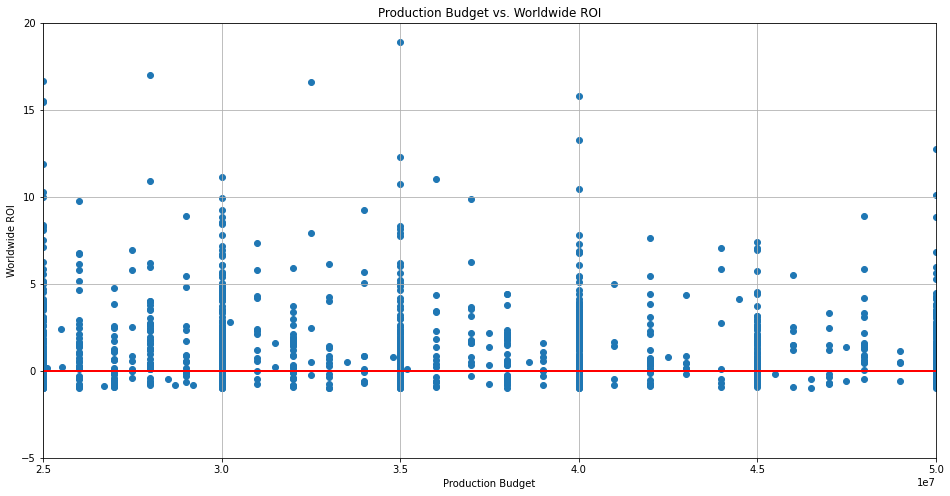

In [61]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 25 and 50 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(25000000, 50000000)
plt.ylim(-5, 20)
plt.grid();



In [62]:
num_movies_25_to_50_with_neg_return_ww = relevant_movies[(relevant_movies['production_budget'] > 25000000) & (relevant_movies['production_budget'] <= 50000000) & (relevant_movies['worldwide_roi'] <= 0)].shape[0]
num_movies_25_to_50_with_neg_return_ww

317

In [63]:
per_movies_25_to_50_with_neg_return_ww = (num_movies_25_to_50_with_neg_return_ww/(num_movies_25_to_50_with_neg_return_ww + (relevant_movies[(relevant_movies['production_budget'] > 25000000) & (relevant_movies['production_budget'] <= 50000000) & (relevant_movies['worldwide_roi'] > 0)].shape[0]))) * 100
per_movies_25_to_50_with_neg_return_ww

30.33492822966507

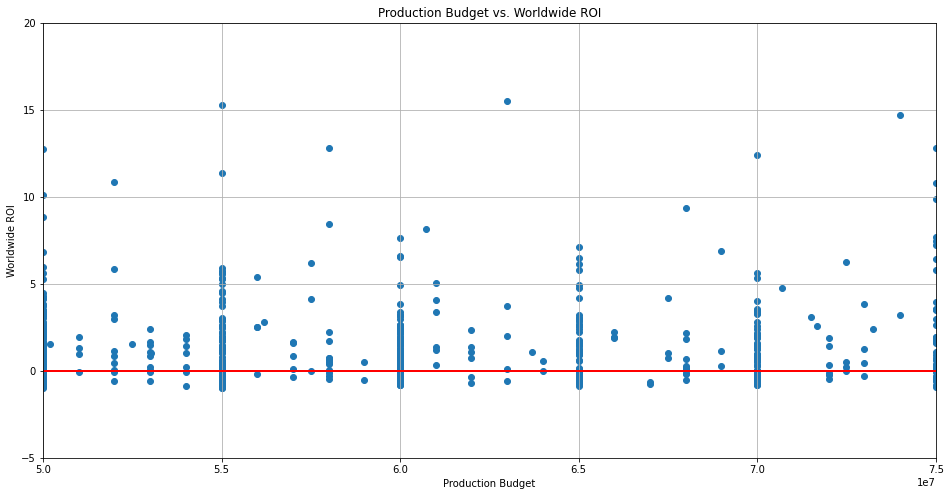

In [64]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 50 and 75 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(50000000, 75000000)
plt.ylim(-5, 20)
plt.grid();


In [65]:
num_movies_50_to_75_with_neg_return_ww = relevant_movies[(relevant_movies['production_budget'] > 50000000) & (relevant_movies['production_budget'] <= 75000000) & (relevant_movies['worldwide_roi'] <= 0)].shape[0]
num_movies_50_to_75_with_neg_return_ww

115

In [66]:
per_movies_50_to_75_with_neg_return_ww = (num_movies_50_to_75_with_neg_return_ww/(num_movies_50_to_75_with_neg_return_ww + (relevant_movies[(relevant_movies['production_budget'] > 50000000) & (relevant_movies['production_budget'] <= 75000000) & (relevant_movies['worldwide_roi'] > 0)].shape[0]))) * 100
per_movies_50_to_75_with_neg_return_ww

25.49889135254989

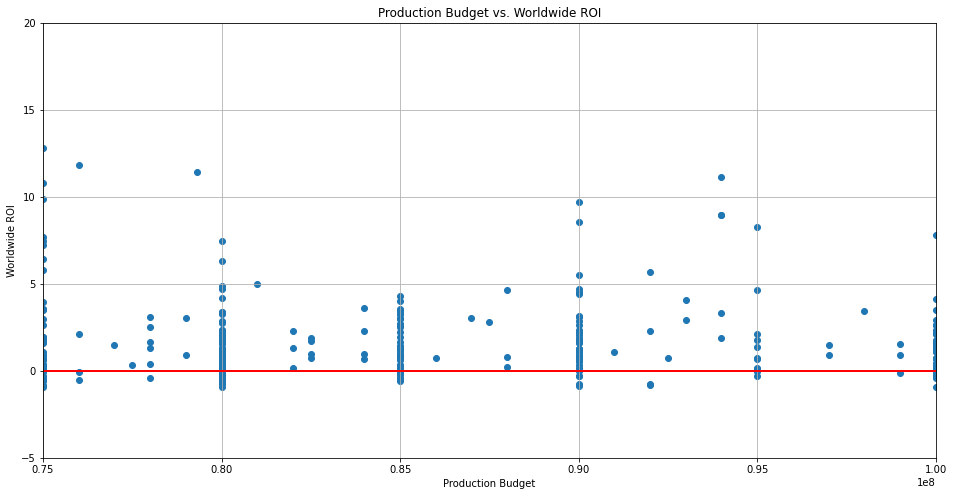

In [67]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 75 and 100 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(75000000, 100000000)
plt.ylim(-5, 20)
plt.grid();


In [68]:
num_movies_75_to_100_with_neg_return_ww = relevant_movies[(relevant_movies['production_budget'] > 75000000) & (relevant_movies['production_budget'] <= 100000000) & (relevant_movies['worldwide_roi'] <= 0)].shape[0]
num_movies_75_to_100_with_neg_return_ww

49

In [69]:
per_movies_75_to_100_with_neg_return_ww = (num_movies_75_to_100_with_neg_return_ww/(num_movies_75_to_100_with_neg_return_ww + (relevant_movies[(relevant_movies['production_budget'] > 75000000) & (relevant_movies['production_budget'] <= 100000000) & (relevant_movies['worldwide_roi'] > 0)].shape[0]))) * 100
per_movies_75_to_100_with_neg_return_ww

19.06614785992218

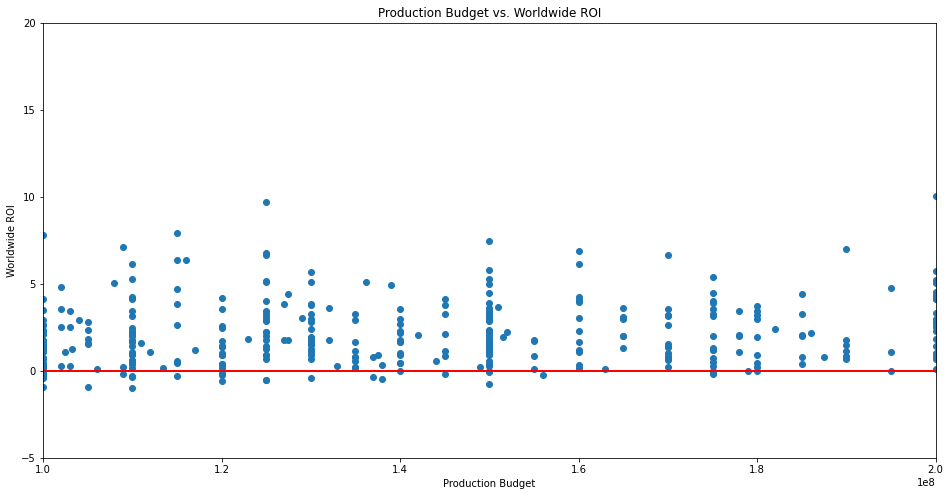

In [70]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 100 and 200 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(100000000, 200000000)
plt.ylim(-5, 20)

plt.savefig('/Users/ericdenbin/Documents/flatiron_ds/phase_1/phase_1_project/lej_project1/Appendix_Graph_100_200_WW.png');


In [71]:
num_movies_100_to_200_with_neg_return_ww = relevant_movies[(relevant_movies['production_budget'] > 100000000) & (relevant_movies['production_budget'] <= 200000000) & (relevant_movies['worldwide_roi'] <= 0)].shape[0]
num_movies_100_to_200_with_neg_return_ww

22

In [72]:
per_movies_100_to_200_with_neg_return_ww = (num_movies_100_to_200_with_neg_return_ww/(num_movies_100_to_200_with_neg_return_ww + (relevant_movies[(relevant_movies['production_budget'] > 100000000) & (relevant_movies['production_budget'] <= 200000000) & (relevant_movies['worldwide_roi'] > 0)].shape[0]))) * 100
per_movies_100_to_200_with_neg_return_ww

6.853582554517133

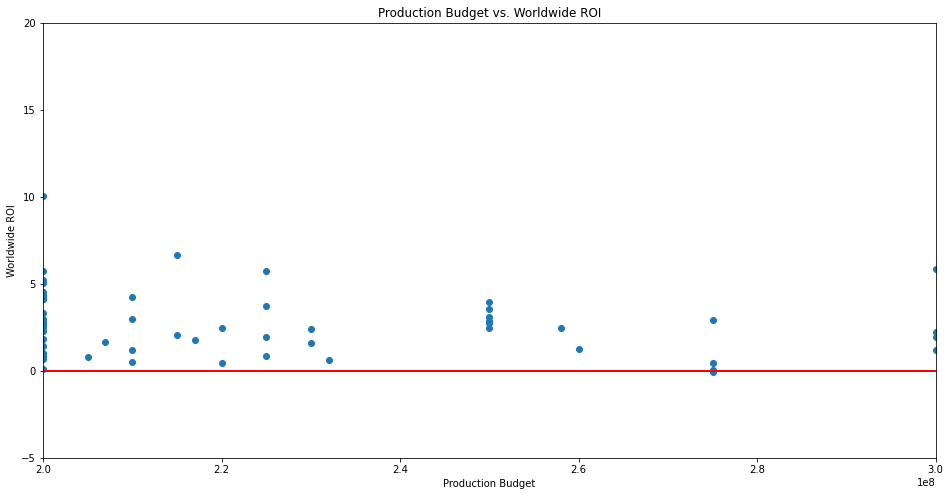

In [73]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 200 and 300 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(200000000, 300000000)
plt.ylim(-5, 20)
plt.savefig('/Users/ericdenbin/Documents/flatiron_ds/phase_1/phase_1_project/lej_project1/Appendix_Graph_200_300_WW.png');



In [74]:
num_movies_200_to_300_with_neg_return_ww = relevant_movies[(relevant_movies['production_budget'] > 200000000) & (relevant_movies['production_budget'] <= 300000000) & (relevant_movies['worldwide_roi'] <= 0)].shape[0]
num_movies_200_to_300_with_neg_return_ww

1

In [75]:
per_movies_200_to_300_with_neg_return_ww = (num_movies_200_to_300_with_neg_return_ww/(num_movies_200_to_300_with_neg_return_ww + (relevant_movies[(relevant_movies['production_budget'] > 200000000) & (relevant_movies['production_budget'] <= 300000000) & (relevant_movies['worldwide_roi'] > 0)].shape[0]))) * 100
per_movies_200_to_300_with_neg_return_ww

2.857142857142857

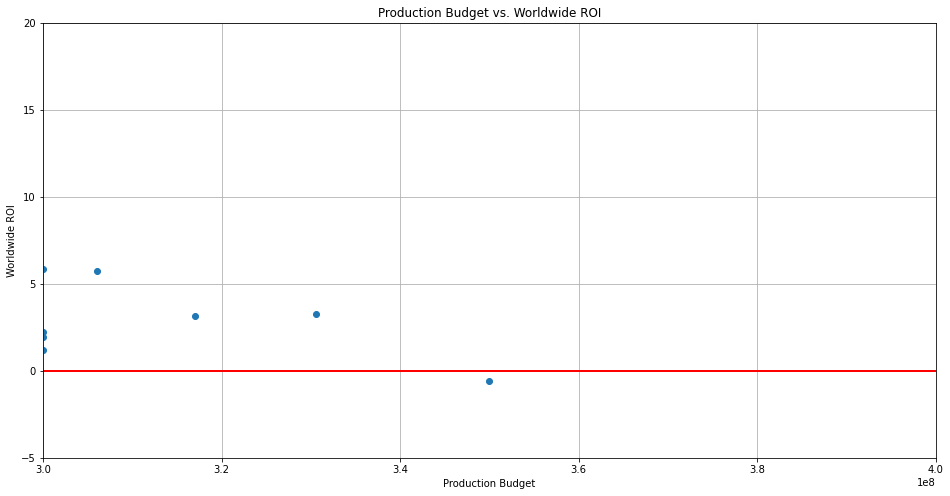

In [76]:
# Segment of Production Budget vs. Worldwide ROI where production budget is between 200 and 300 million dollars.

fig, ax = plt.subplots(figsize = (16,8))

X = relevant_movies['production_budget']

Y = relevant_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')
ynew = 0
ax.axhline(ynew, color = 'r', linestyle = "-", linewidth = "2")

plt.xlim(300000000, 400000000)
plt.ylim(-5, 20)
plt.grid();

In [77]:
num_movies_300_to_400_with_neg_return_ww = relevant_movies[(relevant_movies['production_budget'] > 300000000) & (relevant_movies['production_budget'] <= 400000000) & (relevant_movies['worldwide_roi'] <= 0)].shape[0]
num_movies_300_to_400_with_neg_return_ww

1

In [78]:
per_movies_300_to_400_with_neg_return_ww = (num_movies_300_to_400_with_neg_return_ww/(num_movies_300_to_400_with_neg_return_ww + (relevant_movies[(relevant_movies['production_budget'] > 300000000) & (relevant_movies['production_budget'] <= 400000000) & (relevant_movies['worldwide_roi'] > 0)].shape[0]))) * 100
per_movies_300_to_400_with_neg_return_ww

25.0

In [79]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577,0.846921,0.441163,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673,0.607331,-0.703283,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108,-1.337036,-7.184770,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841,0.764364,0.279748,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696,0.759251,0.488859,12,2017


In [80]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.789430,5.532577,0.846921,0.441163,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.412899,1.546673,0.607331,-0.703283,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.877822,-0.572108,-1.337036,-7.184770,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.388403,3.243841,0.764364,0.279748,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.956408,3.153696,0.759251,0.488859,12,2017


In [81]:
top_movies = movie_budgets_df[(movie_budgets_df['worldwide_gross'] > 0) 
                              & (movie_budgets_df['production_budget'] >= 5000000) 
                              & (movie_budgets_df['worldwide_roi'] >= 2.75) 
                              & (movie_budgets_df['domestic_roi'] >= 1.05) 
                              & (movie_budgets_df['year'] < 2020)]
top_movies.head()
top_movies.shape


(775, 14)

In [82]:
top_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,2.060988,5.710167,0.850972,0.673308,12,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,1.262718,5.827114,0.853525,0.558054,4,2018
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,398279547,1292935897,1.770131,5.746382,0.851772,0.639006,5,2012
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864,2.033817,6.669092,0.869606,0.670382,6,2015
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,500059566,1148258224,2.500298,5.741291,0.851660,0.714310,2,2018


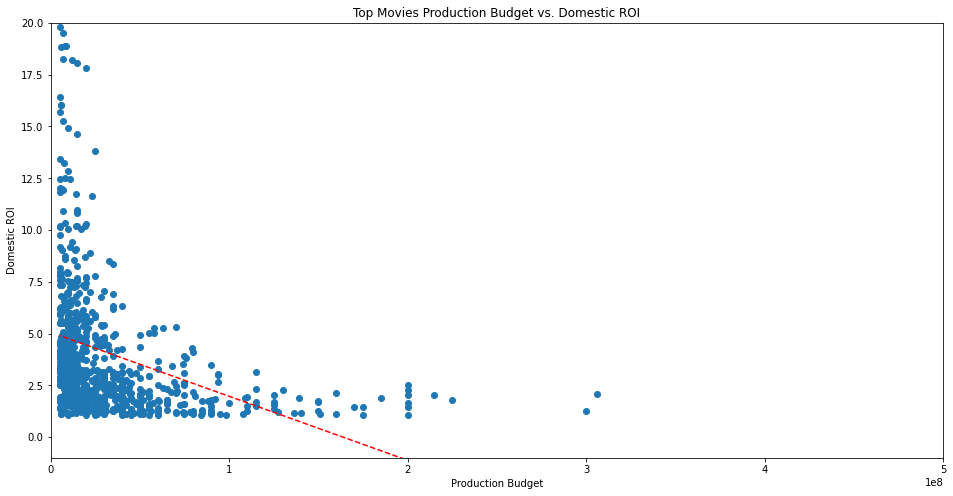

In [83]:
fig, ax = plt.subplots(figsize=(16,8))

X = top_movies['production_budget']

Y = top_movies['domestic_roi']

ax.scatter(X, Y)
ax.set_title('Top Movies Production Budget vs. Domestic ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')

plt.xlim(0, 500000000)
plt.ylim(-1, 20)

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

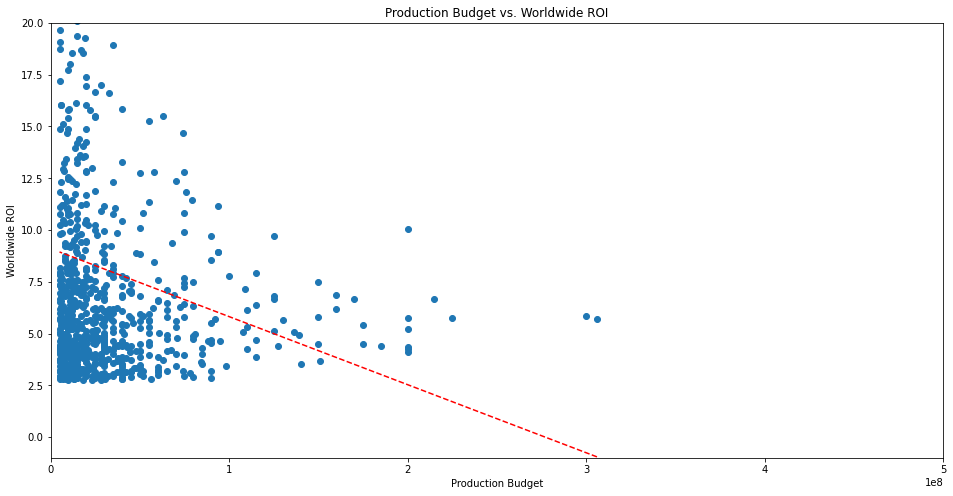

In [84]:
fig, ax = plt.subplots(figsize=(16,8))

X = top_movies['production_budget']

Y = top_movies['worldwide_roi']

ax.scatter(X, Y)
ax.set_title('Production Budget vs. Worldwide ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

plt.xlim(0, 500000000)
plt.ylim(-1, 20)

z = np.polyfit(X, Y, 1) #create trendline 
p = np.poly1d(z)  
plt.plot(X,p(X),"r--") #plot trendline

In [85]:
top_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,2.060988,5.710167,0.850972,0.673308,12,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,1.262718,5.827114,0.853525,0.558054,4,2018
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,398279547,1292935897,1.770131,5.746382,0.851772,0.639006,5,2012
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864,2.033817,6.669092,0.869606,0.670382,6,2015
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,500059566,1148258224,2.500298,5.741291,0.851660,0.714310,2,2018


In [86]:
movies_month = movie_budgets_df.groupby('month').mean()

In [87]:
movies_month.drop('id', axis=1, inplace=True)

In [88]:
movies_month.head()

,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,year
month,,,,,,,,,,
1,2.084349e+07,2.394962e+07,4.656382e+07,3.106128e+06,2.572033e+07,1.935052,3.198986,-inf,-inf,2003.489914
2,2.804642e+07,3.541465e+07,7.154453e+07,7.368234e+06,4.349811e+07,2.107934,3.547812,-inf,-inf,2004.579082
3,3.078208e+07,3.857299e+07,8.063337e+07,7.790907e+06,4.985129e+07,1.324664,3.449646,-inf,-inf,2005.542553
4,2.380283e+07,2.732840e+07,5.992026e+07,3.525568e+06,3.611743e+07,1.037507,2.776726,-inf,-inf,2005.138767
5,4.713520e+07,6.669795e+07,1.622680e+08,1.956275e+07,1.151328e+08,1.866915,4.351029,-inf,-inf,2003.653563


In [89]:
movies_month.drop({'domestic_gross', 'worldwide_gross', 'domestic_profit', 'worldwide_profit', 'worldwide_profit_margin', 'domestic_profit_margin', 'year'}, axis=1, inplace=True)

In [90]:
movies_month

,production_budget,domestic_roi,worldwide_roi
month,,,
1,2.084349e+07,1.935052,3.198986
2,2.804642e+07,2.107934,3.547812
3,3.078208e+07,1.324664,3.449646
4,2.380283e+07,1.037507,2.776726
5,4.713520e+07,1.866915,4.351029
6,4.309912e+07,5.255122,6.889714
7,4.254616e+07,2.425521,5.040113
8,2.555609e+07,2.738651,4.380376
9,2.181290e+07,1.271824,2.824510


In [91]:
movies_month['movie_count'] = movie_budgets_df['month'].value_counts()
movies_month

,production_budget,domestic_roi,worldwide_roi,movie_count
month,,,,
1,2.084349e+07,1.935052,3.198986,347
2,2.804642e+07,2.107934,3.547812,392
3,3.078208e+07,1.324664,3.449646,470
4,2.380283e+07,1.037507,2.776726,454
5,4.713520e+07,1.866915,4.351029,407
6,4.309912e+07,5.255122,6.889714,479
7,4.254616e+07,2.425521,5.040113,440
8,2.555609e+07,2.738651,4.380376,496
9,2.181290e+07,1.271824,2.824510,493


In [92]:
#movies_month.rename({'domestic_profit_to_budget_ratio': 'domestic_roi', 'worldwide_roi': 'worldwide_roi'}, axis=1, inplace=True)
#movies_month

In [93]:
movies_month.reset_index(inplace=True)

In [94]:
movies_month

,month,production_budget,domestic_roi,worldwide_roi,movie_count
0,1,2.084349e+07,1.935052,3.198986,347
1,2,2.804642e+07,2.107934,3.547812,392
2,3,3.078208e+07,1.324664,3.449646,470
3,4,2.380283e+07,1.037507,2.776726,454
4,5,4.713520e+07,1.866915,4.351029,407
5,6,4.309912e+07,5.255122,6.889714,479
6,7,4.254616e+07,2.425521,5.040113,440
7,8,2.555609e+07,2.738651,4.380376,496
8,9,2.181290e+07,1.271824,2.824510,493
9,10,2.039266e+07,2.043329,4.089145,573


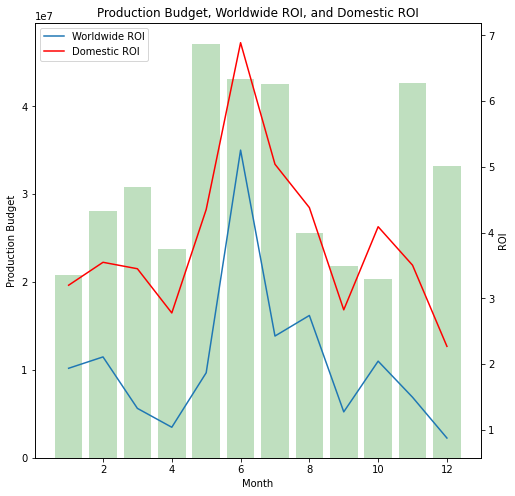

In [95]:
fig, ax1 = plt.subplots(figsize = (8, 8))

x = movies_month['month']
h = movies_month['production_budget']
y1 = movies_month['domestic_roi']
y2 = movies_month['worldwide_roi']


ax2 = ax1.twinx()
#ax3 = ax2.twinx()

ax1.bar(x, h, alpha = 0.25, color='green')
#plt.locator_params(axis=x, nbins=12)

line1, = ax2.plot(x, y1)
line2, = ax2.plot(x, y2, color='red')


ax1.set_title('Production Budget, Worldwide ROI, and Domestic ROI')
ax1.set_xlabel('Month')
ax1.set_ylabel('Production Budget')

ax2.set_ylabel('ROI')
ax2.legend([line1, line2],['Worldwide ROI', 'Domestic ROI'], loc='upper left');


#
#ax3.legend([loc='upper right');
             
#ax1.set_yticks([1,2,3,4,5,6,7,8,9])



In [96]:
top_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,month,year
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,2.060988,5.710167,0.850972,0.673308,12,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,1.262718,5.827114,0.853525,0.558054,4,2018
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,398279547,1292935897,1.770131,5.746382,0.851772,0.639006,5,2012
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864,2.033817,6.669092,0.869606,0.670382,6,2015
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,500059566,1148258224,2.500298,5.741291,0.851660,0.714310,2,2018


In [97]:
top_movies.shape

(775, 14)

In [98]:
top_movies_month = top_movies.groupby('month').mean()

In [99]:
top_movies_month.head()

,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,year
month,,,,,,,,,,,
1,61.340909,1.508864e+07,6.064603e+07,1.063580e+08,4.555739e+07,9.126936e+07,3.671639,7.261127,0.842005,0.726656,2007.568182
2,60.762712,2.602712e+07,9.876946e+07,1.790130e+08,7.274234e+07,1.529858e+08,3.896533,6.531677,0.830403,0.723726,2006.084746
3,54.825397,2.935079e+07,1.036613e+08,2.063581e+08,7.431054e+07,1.770073e+08,3.768023,7.124758,0.839426,0.722721,2003.888889
4,58.852941,2.844118e+07,9.223844e+07,1.944605e+08,6.379726e+07,1.660193e+08,4.519145,8.048194,0.831628,0.718286,2005.029412
5,50.884615,4.582698e+07,1.798455e+08,3.818579e+08,1.340185e+08,3.360309e+08,4.604843,9.401893,0.871727,0.749361,2001.384615


In [100]:
top_movies_month.head()

,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,year
month,,,,,,,,,,,
1,61.340909,1.508864e+07,6.064603e+07,1.063580e+08,4.555739e+07,9.126936e+07,3.671639,7.261127,0.842005,0.726656,2007.568182
2,60.762712,2.602712e+07,9.876946e+07,1.790130e+08,7.274234e+07,1.529858e+08,3.896533,6.531677,0.830403,0.723726,2006.084746
3,54.825397,2.935079e+07,1.036613e+08,2.063581e+08,7.431054e+07,1.770073e+08,3.768023,7.124758,0.839426,0.722721,2003.888889
4,58.852941,2.844118e+07,9.223844e+07,1.944605e+08,6.379726e+07,1.660193e+08,4.519145,8.048194,0.831628,0.718286,2005.029412
5,50.884615,4.582698e+07,1.798455e+08,3.818579e+08,1.340185e+08,3.360309e+08,4.604843,9.401893,0.871727,0.749361,2001.384615


In [101]:
top_movies_month.drop('id', axis=1, inplace=True)

In [102]:
top_movies_month.drop({'domestic_gross', 'worldwide_gross', 'domestic_profit', 'worldwide_profit'}, axis=1, inplace=True)

In [103]:
#top_movies_month.rename({'domestic_profit_to_budget_ratio': 'domestic_roi', 'worldwide_profit_to_budget_ratio': 'worldwide_roi'}, axis=1, inplace=True)

In [104]:
top_movies_month.head()

,production_budget,domestic_roi,worldwide_roi,worldwide_profit_margin,domestic_profit_margin,year
month,,,,,,
1,1.508864e+07,3.671639,7.261127,0.842005,0.726656,2007.568182
2,2.602712e+07,3.896533,6.531677,0.830403,0.723726,2006.084746
3,2.935079e+07,3.768023,7.124758,0.839426,0.722721,2003.888889
4,2.844118e+07,4.519145,8.048194,0.831628,0.718286,2005.029412
5,4.582698e+07,4.604843,9.401893,0.871727,0.749361,2001.384615


In [105]:
top_movies_month.drop({'worldwide_profit_margin', 'domestic_profit_margin'}, axis=1, inplace=True)

In [106]:
top_movies_month

,production_budget,domestic_roi,worldwide_roi,year
month,,,,
1,1.508864e+07,3.671639,7.261127,2007.568182
2,2.602712e+07,3.896533,6.531677,2006.084746
3,2.935079e+07,3.768023,7.124758,2003.888889
4,2.844118e+07,4.519145,8.048194,2005.029412
5,4.582698e+07,4.604843,9.401893,2001.384615
6,3.977093e+07,4.817983,9.489340,1998.779070
7,3.839851e+07,3.656340,7.773473,2002.552239
8,2.012042e+07,3.732317,6.933989,2005.833333
9,1.771042e+07,4.194985,7.795637,2003.583333


In [107]:
top_movies_month['movie_count'] = top_movies['month'].value_counts()
top_movies_month

,production_budget,domestic_roi,worldwide_roi,year,movie_count
month,,,,,
1,1.508864e+07,3.671639,7.261127,2007.568182,44
2,2.602712e+07,3.896533,6.531677,2006.084746,59
3,2.935079e+07,3.768023,7.124758,2003.888889,63
4,2.844118e+07,4.519145,8.048194,2005.029412,34
5,4.582698e+07,4.604843,9.401893,2001.384615,52
6,3.977093e+07,4.817983,9.489340,1998.779070,86
7,3.839851e+07,3.656340,7.773473,2002.552239,67
8,2.012042e+07,3.732317,6.933989,2005.833333,54
9,1.771042e+07,4.194985,7.795637,2003.583333,48


In [108]:
top_movies_month.reset_index(inplace=True)

<ipython-input-109-109758179ddb>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(months, size = 12)


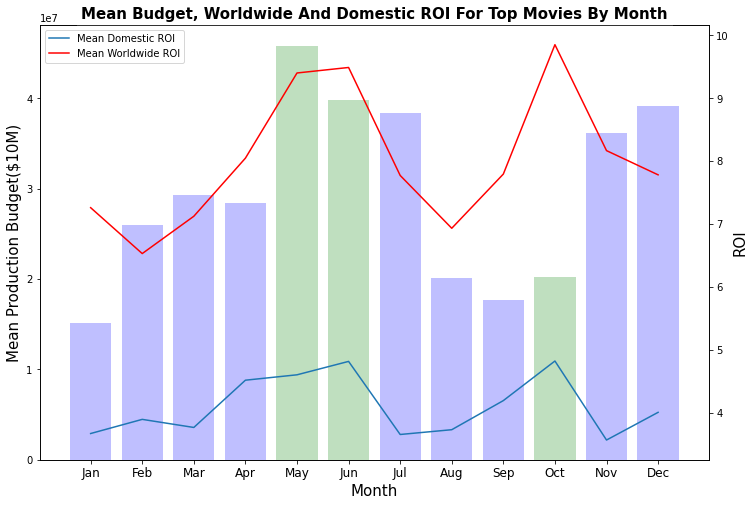

In [109]:
fig, ax1 = plt.subplots(figsize = (12, 8))

x = top_movies_month['month']
h = top_movies_month['production_budget']
y1 = top_movies_month['domestic_roi']
y2 = top_movies_month['worldwide_roi']

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax2 = ax1.twinx()

ax1.bar(x, h, alpha = 0.25, color=['blue', 'blue', 'blue', 'blue', 'green', 'green', 'blue', 'blue', 'blue','green', 'blue', 'blue'])

line1, = ax2.plot(x, y1)
line2, = ax2.plot(x, y2, color='red')

ax1.set_title('Mean Budget, Worldwide And Domestic ROI For Top Movies By Month', {'fontsize':15, 'fontweight':'bold'}, backgroundcolor = 'white')
ax1.set_xlabel('Month', fontsize = 15)
ax1.set_xticklabels(months, size = 12)
ax1.set_ylabel('Mean Production Budget($10M)', fontsize = 15)
ax1.set_xticks(list(range(1,13)))

ax2.set_ylabel('ROI', fontsize = 15)
ax2.legend([line1, line2],['Mean Domestic ROI', 'Mean Worldwide ROI'], loc='upper left')

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

plt.savefig('/Users/ericdenbin/Documents/flatiron_ds/phase_1/phase_1_project/lej_project1/Budget_Worldwide_And_Domestic_ROI_For_Top_Movies_Month.png', bbox_inches='tight');

<ipython-input-110-da7f42878f46>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, size = 12)


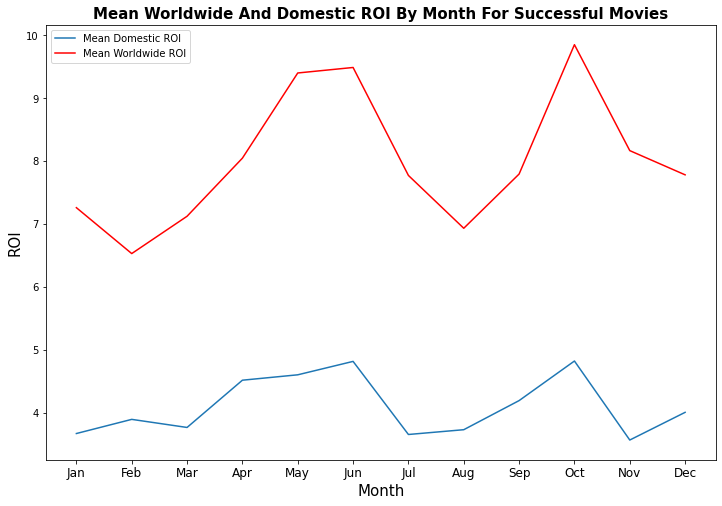

In [110]:
fig, ax = plt.subplots(figsize = (12, 8))

x = top_movies_month['month']
h = top_movies_month['production_budget']
y1 = top_movies_month['domestic_roi']
y2 = top_movies_month['worldwide_roi']

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#ax1 = ax.twinx()

#ax1.bar(x, h, alpha = 0.25, color='green')

line1, = ax.plot(x, y1)
line2, = ax.plot(x, y2, color='red')

ax.set_title('Mean Worldwide And Domestic ROI By Month For Successful Movies', {'fontsize':15, 'fontweight':'bold'})
ax.set_xlabel('Month', fontsize = 15)
ax.set_xticklabels(months, size = 12)
ax.set_ylabel('ROI', fontsize = 15)
ax.set_xticks(list(range(1,13)))

ax.legend([line1, line2],['Mean Domestic ROI', 'Mean Worldwide ROI'], loc='upper left')

#ax1.set_ylabel('ROI', fontsize = 15)
plt.grid(False)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

#fig = ax.get_figure()
plt.savefig('/Users/ericdenbin/Documents/flatiron_ds/phase_1/phase_1_project/lej_project1/Budget_Worldwide_And_Domestic_ROI_For_Top_Movies_Month_No_Bar.png', bbox_inches='tight');

''

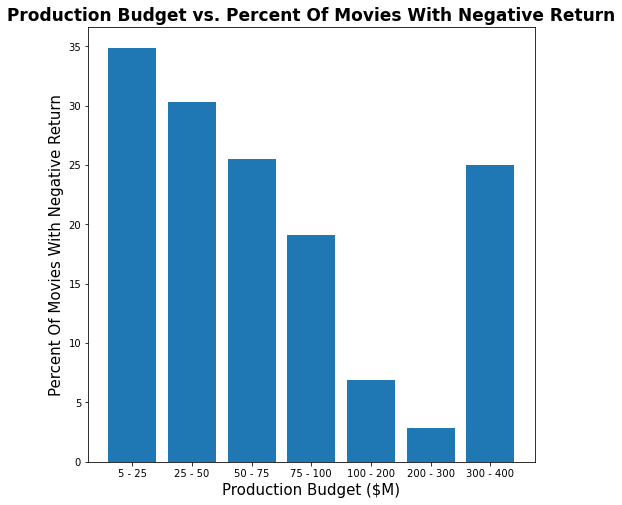

In [111]:
fig, ax = plt.subplots(figsize=(8,8))

x = [('5 - 25'), ('25 - 50'), ('50 - 75'), ('75 - 100'), ('100 - 200'), ('200 - 300'), ('300 - 400')]

h = [per_movies_5_to_25_with_neg_return_ww, per_movies_25_to_50_with_neg_return_ww, per_movies_50_to_75_with_neg_return_ww,
     per_movies_75_to_100_with_neg_return_ww, per_movies_100_to_200_with_neg_return_ww, per_movies_200_to_300_with_neg_return_ww,
    per_movies_300_to_400_with_neg_return_ww]

ax.bar(x, h);

ax.set_title('Production Budget vs. Percent Of Movies With Negative Return', {'fontsize':17, 'fontweight':'bold'})
ax.set_xlabel('Production Budget ($M)', fontsize = 15)
ax.set_ylabel('Percent Of Movies With Negative Return', fontsize = 15)


plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

;

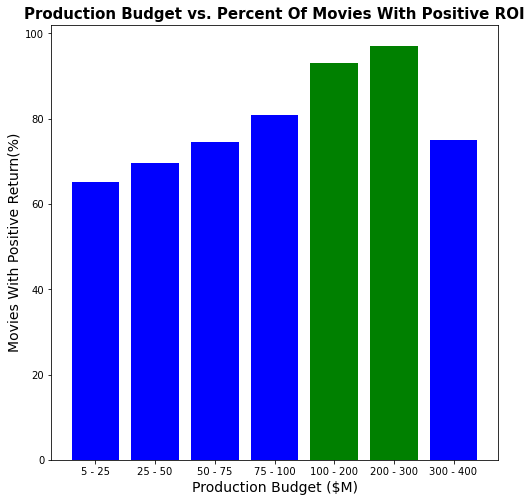

In [112]:
fig, ax = plt.subplots(figsize=(8,8))

x = [('5 - 25'), ('25 - 50'), ('50 - 75'), ('75 - 100'), ('100 - 200'), ('200 - 300'), ('300 - 400')]

h = [(100 - per_movies_5_to_25_with_neg_return_ww), 
     (100 - per_movies_25_to_50_with_neg_return_ww), 
     (100 - per_movies_50_to_75_with_neg_return_ww),
     (100 - per_movies_75_to_100_with_neg_return_ww), 
     (100 - per_movies_100_to_200_with_neg_return_ww), 
     (100 - per_movies_200_to_300_with_neg_return_ww), 
     (100 - per_movies_300_to_400_with_neg_return_ww)]

ax.bar(x, h, color=['blue', 'blue', 'blue', 'blue', 'green', 'green', 'blue']);

ax.set_title('Production Budget vs. Percent Of Movies With Positive ROI', {'fontsize':15, 'fontweight':'bold'})
ax.set_xlabel('Production Budget ($M)', fontsize = 14)
ax.set_ylabel('Movies With Positive Return(%)', fontsize = 14)

plt.grid(False)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)


plt.savefig('/Users/ericdenbin/Documents/flatiron_ds/phase_1/phase_1_project/lej_project1/budget_to_pos_ROI_Highlighted_Bars_No_Grid.png');

''

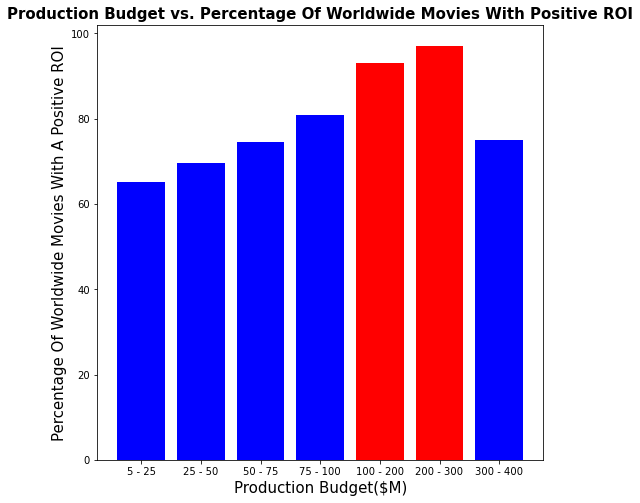

In [113]:
fig, ax = plt.subplots(figsize=(8,8))

x = [('5 - 25'), ('25 - 50'), ('50 - 75'), ('75 - 100'), ('100 - 200'), ('200 - 300'), ('300 - 400')]

h = [(100 - per_movies_5_to_25_with_neg_return_ww), 
     (100 - per_movies_25_to_50_with_neg_return_ww), 
     (100 - per_movies_50_to_75_with_neg_return_ww),
     (100 - per_movies_75_to_100_with_neg_return_ww), 
     (100 - per_movies_100_to_200_with_neg_return_ww), 
     (100 - per_movies_200_to_300_with_neg_return_ww), 
     (100 - per_movies_300_to_400_with_neg_return_ww)]

ax.bar(x, h, color = ['blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue'])

ax.set_title('Production Budget vs. Percentage Of Worldwide Movies With Positive ROI', {'fontsize':15, 'fontweight':'bold'})
ax.set_xlabel('Production Budget($M)', fontsize = 15)
ax.set_ylabel('Percentage Of Worldwide Movies With A Positive ROI', fontsize = 15)

#ax.set_facecolor('xkcd:white')

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

plt.savefig('/Users/ericdenbin/Documents/flatiron_ds/phase_1/phase_1_project/lej_project1/budget_to_pos_ROI_Highlighted_Bars.png')

;